In [83]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import svm


from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import math

In [2]:
load_boston()

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston=load_boston()

In [5]:
features = boston.data
target = boston.target
feature_names = boston.feature_names

In [6]:
print("Features shape: {}".format(features.shape))
print("Target variables: {}".format(target.shape))
print("Feature names: {}".format(feature_names))

Features shape: (506, 13)
Target variables: (506,)
Feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
feature = pd.DataFrame(features)
target = pd.DataFrame(target)
boston = pd.concat([feature,target],axis=1)

In [8]:
feature_names = feature_names.tolist() + ["Target"]
boston.columns = feature_names

In [9]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [10]:
boston.shape

(506, 14)

In [11]:
X = boston.iloc[:,0:-1]
y = boston.iloc[:,-1]

In [12]:
# Finding out the correlation between the features
corr = X.corr()
corr.shape

(13, 13)

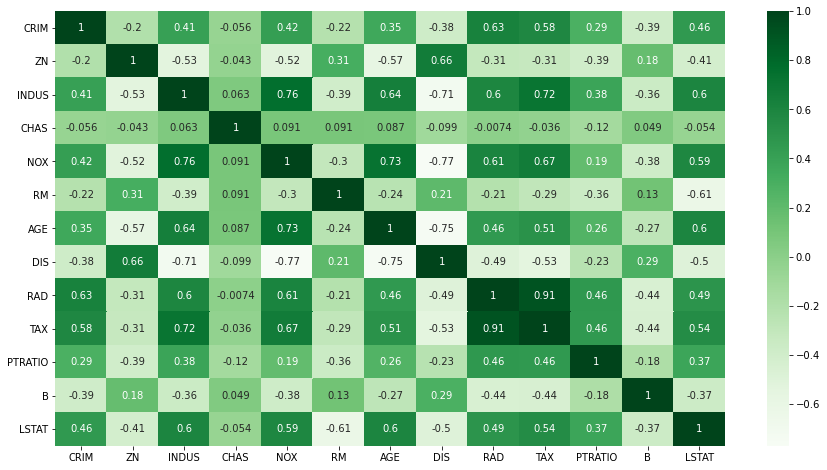

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True ,cmap='Greens')

In [14]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Target, dtype: float64

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [18]:
sd = StandardScaler()
X_train = sd.fit_transform(X_train)
X_test = sd.transform(X_test)

In [19]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [20]:
y_train.shape

(404,)

In [21]:
y_test.shape

(102,)

In [22]:
X_test.shape

(102, 13)

# KNN Regressor

In [23]:
knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

In [24]:
mse=mean_squared_error(y_test,y_pred)

In [25]:
mse

20.60552941176471

In [26]:
rmse = math.sqrt(mse)
rmse

4.539331383779412

In [27]:
Compare = pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_pred)],axis = 1)
Compare.columns = ['Real values','Predicted Values']
Compare

,Real values,Predicted Values
0,23.6,25.84
1,32.4,33.64
2,13.6,17.34
3,22.8,24.08
4,16.1,17.44
...,...,...
97,17.9,9.20
98,9.6,11.88
99,17.2,11.80
100,22.5,21.18


In [28]:
grid_search= {
    'n_neighbors':[5,10,15,20],
    'weights':['uniform','distance'],
    'p':[1,2]
             }
gs = GridSearchCV(KNeighborsRegressor(),grid_search,verbose=1,cv=10,n_jobs=-1)
gs_results = gs.fit(X_train,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    3.0s finished


In [29]:
gs_results

GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 15, 20], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [30]:
print("Best score: {}".format(gs_results.best_score_))
print("Best Estimator: {}".format(gs_results.best_estimator_))
print("Best Parameters: {}".format(gs_results.best_params_))

Best score: 0.7866043675713893
Best Estimator: KNeighborsRegressor(p=1, weights='distance')
Best Parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


#### Manhattan distance, Neighbors: 5, weights: based on distance.

In [31]:
knn_best = KNeighborsRegressor(n_neighbors=5,p=1,weights='distance')
knn_best.fit(X_train,y_train)
y_pred_best = knn_best.predict(X_test)

In [32]:
mse = mean_squared_error(y_pred_best,y_test)
print(mse)

20.02569724535518


In [33]:
print("RMSE : {}".format(math.sqrt(mse)))

RMSE : 4.475008072099444


# SVM Regressor

In [87]:
grid_search_svm= {
    'C':[1,3,5,7,10,12,15,20],
    'kernel':['rbf','linear']
             }
gs_svm = GridSearchCV(svm.SVR(),grid_search_svm,verbose=1,cv=10,n_jobs=-1)
gs_svm_results = gs_svm.fit(X_train,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    4.8s finished


In [88]:
gs_svm_results.best_params_

{'C': 20, 'kernel': 'rbf'}

In [90]:
math.sqrt(mean_squared_error(gs_svm_results.predict(X_test),y_test))

3.4080531330510926

## Linear Regression

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred_lin = lin_reg.predict(X_test)

In [36]:
mse_lin = mean_squared_error(y_pred_lin,y_test)

In [37]:
mse_lin

24.29111947497352

In [38]:

rmse_lin = math.sqrt(mse_lin)

In [39]:
rmse_lin

4.928602182665337

# Decision Tree Regression

In [40]:
rmse_depth=[]
grid_params = {'max_depth':[2,3,4,5,6,7,8,9,10],'random_state':[42]}
gs_dec = GridSearchCV(DecisionTreeRegressor(),grid_params,verbose=1,n_jobs=-1)
gs_dec_results = gs_dec.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.3s finished


In [41]:
print(gs_dec_results.best_estimator_)
print(gs_dec_results.best_params_)
print(gs_dec_results.best_score_)

DecisionTreeRegressor(max_depth=7, random_state=42)
{'max_depth': 7, 'random_state': 42}
0.6958827618037818


In [42]:
dec_tree_best = DecisionTreeRegressor(max_depth=7,random_state=42)
dec_tree_best.fit(X_train,y_train)
y_pred_dec_best = dec_tree_best.predict(X_test)
mse_dec_best = mean_squared_error(y_pred_dec_best,y_test)
rmse_dec_best = math.sqrt(mse_dec_best)
rmse_dec_best

3.0006168391081665

##### Best Model : DecisionTreeRegressor
##### Evaluation: 
- 𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

- Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

- MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 

- MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

- RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

In [45]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_test, y_pred_dec_best))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred_dec_best))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_dec_best))
print('MSE:',metrics.mean_squared_error(y_test, y_pred_dec_best))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_dec_best)))

R^2: 0.8772230065445347
Adjusted R^2: 0.8590854961477046
MAE: 2.189398804393552
MSE: 9.003701415139483
RMSE: 3.0006168391081665


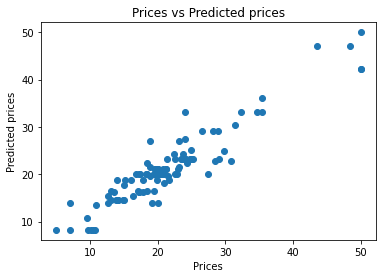

In [47]:
plt.scatter(y_test, y_pred_dec_best)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

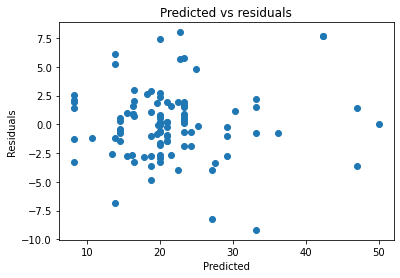

In [49]:
plt.scatter(y_pred_dec_best,y_test-y_pred_dec_best)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

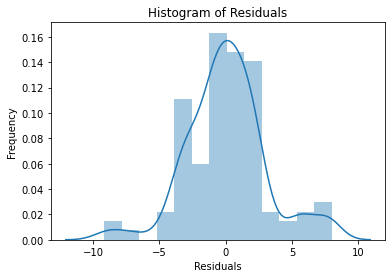

In [52]:
# Error Normality
sns.distplot(y_test-y_pred_dec_best)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## ENSEMBLE Regressors
- RandomForestRegressor
- AdaBoostRegressor
- BaggingRegressor
- ExtraTreesRegressor

In [61]:
#RandomForestRegressor
grid_params_rf = {'n_estimators':[100,150,200],'max_depth':[2,5,8,10,20,25],'random_state':[42]}
gd_rf = GridSearchCV(RandomForestRegressor(),grid_params_rf,verbose=1,n_jobs=-1)
gd_rf_results = gd_rf.fit(X_train,y_train)

#AdaBoost
grid_params_ab = {'base_estimator':[None], 'learning_rate':[0.01,0.1,0.5,1],'n_estimators':[50,100,150,200],'random_state':[42]}
# when none base estimator is same as decision tree regressor 
gd_ab = GridSearchCV(AdaBoostRegressor(),grid_params_ab,verbose=1,n_jobs=-1)
gd_ab_results = gd_ab.fit(X_train,y_train)

#Bagging
grid_params_bag = {'n_estimators':[10,50,100,150,200],'random_state':[42]}
gd_bag = GridSearchCV(BaggingRegressor(),grid_params_bag,verbose=1,n_jobs=-1)
gd_bag_results = gd_bag.fit(X_train,y_train)

#ExtraTrees
grid_params_et = {'n_estimators':[100,150,200],'random_state':[42]}
gd_et = GridSearchCV(ExtraTreesRegressor(),grid_params_et,verbose=1,n_jobs=-1)
gd_et_results = gd_et.fit(X_train,y_train)

#GBRegressor
grid_params_gb = {'n_estimators':[100,150,200],'random_state':[42]}
gd_gb = GridSearchCV(GradientBoostingRegressor(),grid_params_gb,verbose=1,n_jobs=-1)
gd_gb_results = gd_gb.fit(X_train,y_train)

#XGBoost
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   18.9s finished


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    9.8s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    2.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.1s finished


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.1s finished


In [63]:
print(gd_rf_results.best_estimator_)
print(gd_rf_results.best_params_)
print(gd_rf_results.best_score_)

RandomForestRegressor(max_depth=25, random_state=42)
{'max_depth': 25, 'n_estimators': 100, 'random_state': 42}
0.8261832485720959


In [65]:
y_pred_rf = gd_rf_results.predict(X_test)

In [68]:
mse_rf = mean_squared_error(y_test,y_pred_rf)
rmse_rf = math.sqrt(mse_rf)
rmse_rf

2.8129602438238144

In [69]:
# rf = RandomForestRegressor(max_depth=25,n_estimators=100,random_state=42).fit(X_train,y_train)
# mean_squared_error(rf.predict(X_test),y_test)

In [70]:
print(gd_ab_results.best_estimator_)
print(gd_ab_results.best_params_)
print(gd_ab_results.best_score_)

AdaBoostRegressor(learning_rate=1, n_estimators=100, random_state=42)
{'base_estimator': None, 'learning_rate': 1, 'n_estimators': 100, 'random_state': 42}
0.7935131369047532


In [71]:
y_pred_ab = gd_ab_results.predict(X_test)
mse_ab = mean_squared_error(y_test,y_pred_ab)
rmse_ab = math.sqrt(mse_ab)
rmse_ab

3.4183974063466835

In [72]:
print(gd_bag_results.best_estimator_)
print(gd_bag_results.best_params_)
print(gd_bag_results.best_score_)

BaggingRegressor(n_estimators=100, random_state=42)
{'n_estimators': 100, 'random_state': 42}
0.8283678701397565


In [73]:
y_pred_bag = gd_bag_results.predict(X_test)
mse_bag = mean_squared_error(y_test,y_pred_bag)
rmse_bag = math.sqrt(mse_bag)
rmse_bag

2.8472330600144446

In [74]:
print(gd_et_results.best_estimator_)
print(gd_et_results.best_params_)
print(gd_et_results.best_score_)

ExtraTreesRegressor(n_estimators=200, random_state=42)
{'n_estimators': 200, 'random_state': 42}
0.8583218186187583


In [75]:
y_pred_et = gd_et_results.predict(X_test)
mse_et = mean_squared_error(y_test,y_pred_et)
rmse_et = math.sqrt(mse_et)
rmse_et

3.0984319441057444

In [78]:
print(gd_gb_results.best_estimator_)
print(gd_gb_results.best_params_)
print(gd_gb_results.best_score_)

GradientBoostingRegressor(random_state=42)
{'n_estimators': 100, 'random_state': 42}
0.8510931502575201


In [79]:
y_pred_gb = gd_gb_results.predict(X_test)
mse_gb = mean_squared_error(y_test,y_pred_gb)
rmse_gb = math.sqrt(mse_gb)
rmse_gb

2.491621991723557

In [81]:
y_pred_xgb = xgb.predict(X_test)

In [82]:
mse_xgb = mean_squared_error(y_test,y_pred_xgb)
rmse_xgb = math.sqrt(mse_xgb)
rmse_xgb

2.595376031407943

### Best RMSE found with GradientBoost, XGBoost and RandomForestRegressor.
- GBoost: 2.49
- XGBoost: 2.59
- RFRegressor: 2.81